In [8]:
import pandas as pd
df = pd.read_excel('/content/asset-v1_SkillFactory+MFTIDS+SEP2023+type@asset+block@customer_and_transaction__2_.xlsx')
df.head()


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    20000 non-null  int64         
 1   product_id        20000 non-null  int64         
 2   customer_id       20000 non-null  int64         
 3   transaction_date  20000 non-null  datetime64[ns]
 4   online_order      19640 non-null  object        
 5   order_status      20000 non-null  object        
 6   brand             19803 non-null  object        
 7   product_line      19803 non-null  object        
 8   product_class     19803 non-null  object        
 9   product_size      19803 non-null  object        
 10  list_price        20000 non-null  float64       
 11  standard_cost     19803 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 1.8+ MB


In [10]:
df_customers = pd.read_excel('/content/asset-v1_SkillFactory+MFTIDS+SEP2023+type@asset+block@customer_and_transaction__2_.xlsx', sheet_name='customer')
df_customers.head()

<ipython-input-10-164653da7a32>:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df_customers = pd.read_excel('/content/asset-v1_SkillFactory+MFTIDS+SEP2023+type@asset+block@customer_and_transaction__2_.xlsx', sheet_name='customer')


,customer_id,first_name,last_name,gender,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,Eli,Bockman,Male,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,3,Arlin,Dearle,Male,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,0 Holy Cross Court,4211,QLD,Australia,9
3,4,Talbot,NaN,Male,1961-10-03,NaN,IT,Mass Customer,N,No,17979 Del Mar Point,2448,New South Wales,Australia,4
4,5,Sheila-kathryn,Calton,Female,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,9 Oakridge Court,3216,VIC,Australia,9


In [11]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_id            4000 non-null   int64         
 1   first_name             4000 non-null   object        
 2   last_name              3875 non-null   object        
 3   gender                 4000 non-null   object        
 4   DOB                    3913 non-null   datetime64[ns]
 5   job_title              3494 non-null   object        
 6   job_industry_category  3344 non-null   object        
 7   wealth_segment         4000 non-null   object        
 8   deceased_indicator     4000 non-null   object        
 9   owns_car               4000 non-null   object        
 10  address                4000 non-null   object        
 11  postcode               4000 non-null   int64         
 12  state                  4000 non-null   object        
 13  cou

Эта таблица не находится в нормализованной форме. Нормализация данных — это процесс организации данных в базе данных таким образом, чтобы минимизировать повторение информации и избежать аномалий при обновлении, вставке и удалении данных.

Поэтапная нормализация этой таблицы выглядит следующим образом:
1. Первая нормальная форма (1NF): Разделение повторяющихся групп данных в отдельные таблицы. Выделим таблицу продуктов, таблицу клиентов и таблицу транзакций.
2. Для припеведения таблицы во второй нормальной форме (2NF) убедимся, что каждый столбец в таблице зависит только от первичного ключа. Например, столбцы связанные с продуктом будут только в таблице продуктов и не будут повторяться в таблице клиентов и таблице транзакций.
3. Третья нормальная форма (3NF) связана с устранением транзитивных зависимостей.

В результате нормализации мы получим отдельные таблицы для транзакций, продуктов и клиентов, что позволит эффективнее хранить данные и избежать избыточности и аномалий при обновлении.

Итак, в исходном документе Excel есть две таблицы: transactions и customers.

Проверка базы данных на соответствие условиям 1-ой нормальной формы (1-НФ) показазывает, что некоторые признаки (напр., gender в таблице customer) содержат неунифицированные значения, что затрудняет корректную обработку данных. Исправив данную проблему в исходном excel файле, перейдем к следующему этапу нормализации.

Проверим соответствие данной базы данных условиям 2-ой Нормальной формы (2-НФ). Первичные ключи должны состоять из одного аттрибута, т.е. база данных должна находиться в 1-НФ и иметь простой (несоставной) первичный ключ. Проверка на соответствие базы данных условиям 3-й Нормальной формы (3-НФ) показывает, что в таблице transactions столбцы list_price, standard_cost зависят от сочетания столбцов product_id, brand, product_line, product_class, product_size, которые, в свою очередь, зависят от первичного ключа transaction_id, тем самым есть транзитивные зависимости list_price, standard_cost от первичного ключа transaction_id.

Чтобы решить эту проблему была произведена декомпозиция таблицы transactions, создана еще одна таблица products, в которую вынесены соответствующие столбцы, относящиется к продукту, по которому осуществлялась транзакция. Была создана новая таблица products с суррогатным ключом id (т.к. атрибут product_id не обеспечивает уникальность каждого продукта) и созданы связи между таблицами customers, transactions и products. Также была произведена дальнейшая декомпозиция с созданием отдельных справочников, так как требования нормальных форм говорят нам о зависимости неключевых атрибутов с первичным ключом.


После произведенной трансформации,  база данных находится в 3-НФ. Ее схема представлена ниже:

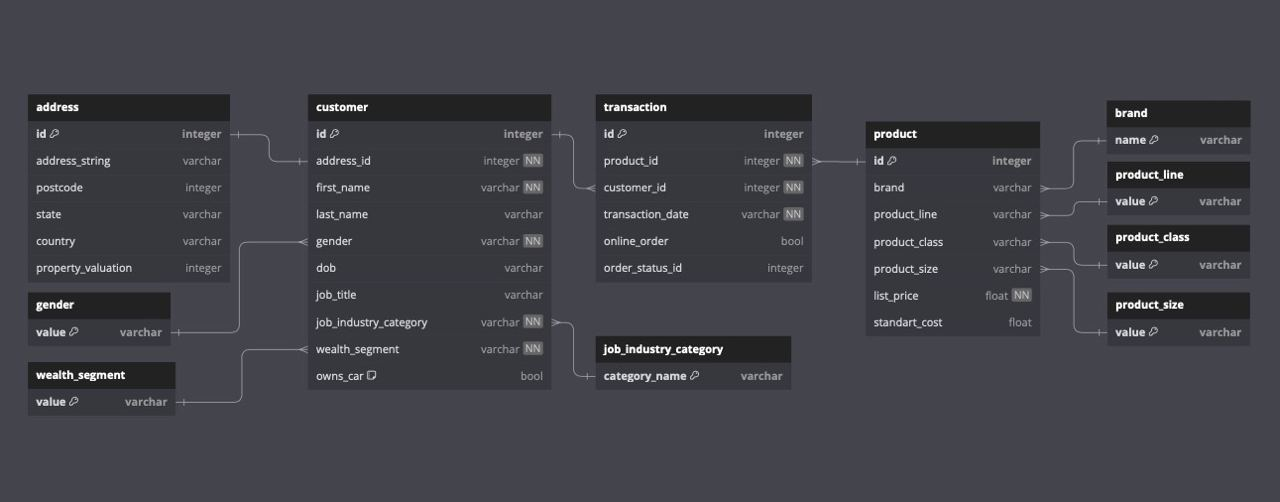